In [1]:
import sqlite3
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
''')
sample_data = [
    ('Mobile', 5, 20000),
    ('Laptop', 2, 60000),
    ('Headphones', 10, 1500),
    ('Monitor', 3, 12000),
    ('Keyboard', 7, 800),
    ('Mouse', 8, 600),
    ('Tablet', 4, 15000),
    ('Charger', 15, 500),
    ('Printer', 2, 7000),
    ('Speaker', 5, 2500),
    ('Smartwatch', 3, 10000),
    ('Camera', 1, 40000),
    ('Router', 4, 2000),
    ('USB Cable', 20, 300),
    ('SSD', 3, 5000),
    ('Hard Disk', 2, 4500),
    ('Tripod', 1, 1200),
    ('Webcam', 3, 2500),
    ('Scanner', 1, 10000),
    ('Desk Lamp', 4, 900)
]
cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sample_data)
conn.commit()

In [3]:
import pandas as pd
query = """
SELECT product, SUM(quantity) AS total_qty, 
       SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""
df = pd.read_sql_query(query, conn)
print(df)

       product  total_qty   revenue
0       Camera          1   40000.0
1      Charger         15    7500.0
2    Desk Lamp          4    3600.0
3    Hard Disk          2    9000.0
4   Headphones         10   15000.0
5     Keyboard          7    5600.0
6       Laptop          2  120000.0
7       Mobile          5  100000.0
8      Monitor          3   36000.0
9        Mouse          8    4800.0
10     Printer          2   14000.0
11      Router          4    8000.0
12         SSD          3   15000.0
13     Scanner          1   10000.0
14  Smartwatch          3   30000.0
15     Speaker          5   12500.0
16      Tablet          4   60000.0
17      Tripod          1    1200.0
18   USB Cable         20    6000.0
19      Webcam          3    7500.0


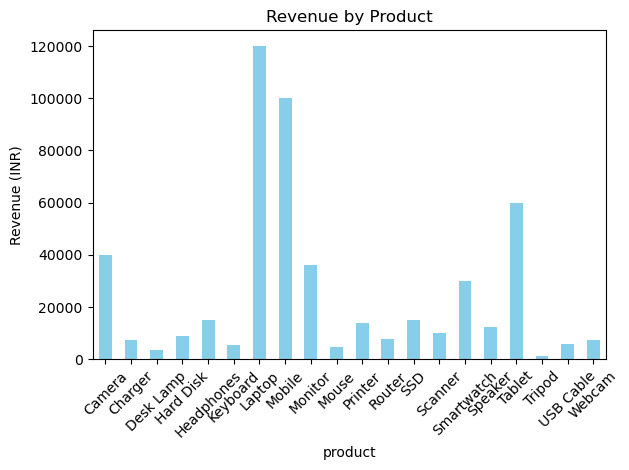

In [5]:
import matplotlib.pyplot as plt
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.ylabel("Revenue (INR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("sales_chart.png")  # Optional
plt.show()